## Markov Random Fields (MRFs) - Edge detection

A Markov Random Field is a model used in the context of undirected graphical models. Instead of a sequence of states like in Markov processes, MRFs consider a set of variables (which can be organized, for instance, in a grid-like structure in image processing). The key property of an MRF is that a variable is conditionally independent of all other variables given its neighbors in the graph.

### Differences with Markov Processes:

- Nature of Model:

    Markov processes usually describe the evolution of a system over time.
    MRFs model dependencies among variables that might not necessarily have a temporal ordering.

- Graph Type:

    Markov processes can be visualized with directed graphs (especially for discrete-time Markov chains).
    MRFs are represented using undirected graphs.

- Dependency:

    In Markov processes, the next state's probability depends only on the current state.
    In MRFs, a variable's probability distribution might depend on the states of its neighbors.

### Application:

**Edge Detection:** The boundaries and transitions in an image can be detected using Markov processes by modeling the dependencies between pixels.

In [1]:
################################################################################################
# RUNME ONCE: only if the imports in the next cell does not work.
# Run this cell once in order to install the dependencies needed for the lab.
# After running this cell, remember to restart the kernel and proceed executing the next cells.
################################################################################################

!pip3 install pillow matplotlib numpy opencv-python

In [2]:
from PIL import Image
import math
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
# Load an image using Pillow and convert to grayscale
image = Image.open('lena_color.png').convert('L')
image = np.array(image)


In [4]:
laplacian = cv2.Laplacian(image, cv2.CV_64F)

In [5]:
# Perform edge detection using Canny filter
edges_canny = cv2.Canny(image, 100, 200)

### Markov Random Field Edge Detection Algorithm

Implement the following algorithm

**Input:**
- `img`: Grayscale image of dimensions H x W
- `percentile`: Percentile for dynamic thresholding (default: 90)
- `extended_neighborhood`: Boolean indicating if diagonal neighbors should be considered (default: True)
- `gradient_weight`: Weight for the gradient term in the energy calculation (default: 0.5)

**Output:**
- `edges`: Binary image indicating detected edges

**Procedure:**

1. Initialize `energy` matrix of size H x W with zeros.
2. Define a helper function `gradient`:
    - Input: `img`, `i`, `j`
    - Computes x-gradient as difference between `img[i+1, j]` and `img[i, j]`.
    - Computes y-gradient as difference between `img[i, j+1]` and `img[i, j]`.
    - Returns the magnitude of the gradient.
3. For each pixel `(i, j)` in `img`:
    - Calculate `basic_energy` as the sum of absolute differences between current pixel and its right and bottom neighbors.
    - If `extended_neighborhood` is True, add to `basic_energy` the sum of absolute differences between current pixel and its diagonal neighbors.
    - Calculate `grad_energy` using the `gradient` function.
    - Compute `combined_energy` as a weighted sum of `basic_energy` and `grad_energy` using the `gradient_weight`.
    - Set `energy[i, j]` to `combined_energy`.
4. Compute the dynamic threshold as the `percentile` of all values in `energy`.
5. Threshold `energy` to create the `edges` image: pixels in `energy` greater than the threshold are set to 255 (white) and others are set to 0 (black).
6. Return `edges`.

In [6]:
"""COMMENT : Here, we define the helper function gradient (step 2 of the process)."""
def gradient(img, i, j):
  x_gradient = img[i+1,j] - img[i,j]
  y_gradient = img[i,j+1] - img[i,j]

  return math.sqrt(x_gradient*x_gradient + y_gradient*y_gradient)

In [11]:
def mrf_edge_detection(img, percentile=71, extended_neighborhood=True, gradient_weight=0.4):

    # COMPLETE based on the algorithm defined above
    H,W = img.shape #This line of code is to obtain the size of the image
    energy = np.zeros((H,W)) #STEP 1 : initialize energy matrix with zeros

    # The embedded loop represents STEP 3 of the process
    for i in range(1,H-1):
      for j in range(1,W-1):
        basic_energy =  abs(img[i,j]-img[i,j+1]) + abs(img[i,j]-img[i+1,j])
        if extended_neighborhood==True:
          basic_energy+= abs(img[i,j]-img[i-1,j-1]) + abs(img[i,j]-img[i+1,j+1])
        grad_energy = gradient(img,i,j)
        combined_energy = (1-gradient_weight)*basic_energy + gradient_weight*grad_energy
        energy[i,j] = combined_energy

    dynamic_threshold = np.percentile(energy,percentile) #STEP 4 of the process


    edges = (energy>dynamic_threshold)*255 #STEP 5 of the process


    return edges #The LAST step of the process

<ipython-input-11-d8e5b8883974>:10: RuntimeWarning: overflow encountered in ubyte_scalars
  basic_energy =  abs(img[i,j]-img[i,j+1]) + abs(img[i,j]-img[i+1,j])
<ipython-input-11-d8e5b8883974>:12: RuntimeWarning: overflow encountered in ubyte_scalars
  basic_energy+= abs(img[i,j]-img[i-1,j-1]) + abs(img[i,j]-img[i+1,j+1])
<ipython-input-6-81b2e0f7a093>:3: RuntimeWarning: overflow encountered in ubyte_scalars
  y_gradient = img[i,j+1] - img[i,j]
<ipython-input-6-81b2e0f7a093>:5: RuntimeWarning: overflow encountered in ubyte_scalars
  return math.sqrt(x_gradient*x_gradient + y_gradient*y_gradient)
<ipython-input-6-81b2e0f7a093>:2: RuntimeWarning: overflow encountered in ubyte_scalars
  x_gradient = img[i+1,j] - img[i,j]


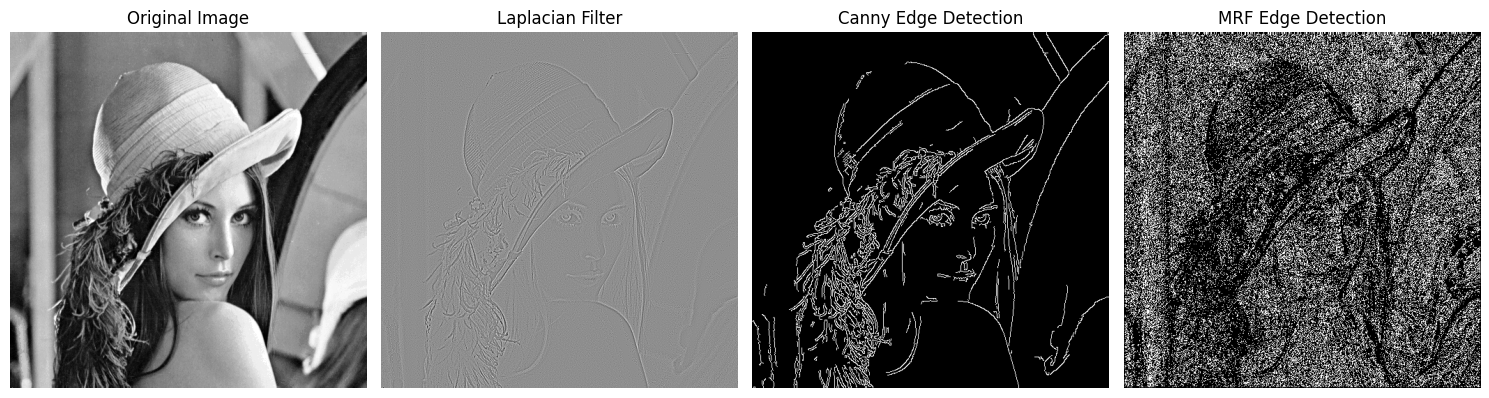

In [12]:
edges_mrf = mrf_edge_detection(image)

# Display images
fig, axarr = plt.subplots(1, 4, figsize=(15, 15))

axarr[0].imshow(image, cmap='gray')
axarr[0].set_title('Original Image')
axarr[0].axis('off')

axarr[1].imshow(laplacian, cmap='gray')
axarr[1].set_title('Laplacian Filter')
axarr[1].axis('off')

axarr[2].imshow(edges_canny, cmap='gray')
axarr[2].set_title('Canny Edge Detection')
axarr[2].axis('off')

axarr[3].imshow(edges_mrf, cmap='gray')
axarr[3].set_title('MRF Edge Detection')
axarr[3].axis('off')

plt.tight_layout()
plt.show()

### Question:

Comment about the visual differences of the edge detection algorithms implemented above. Modify the percentil in the `mrf_edge_detection` function and describe its impact in the output image.

***ANSWER*** :

Let us now compare the visual differences of the edge detection algorithms implemented above. Starting from the Laplacian filter, which is a second-order derivative filter, we can clearly see the isotropical nature of the filter. It detects edges in all directions equally and it produces thin and sharp edges, as we can see from the image.

We move on now to the Canny filter. The Canny filter is a more sophisticated option as it involves more steps in the process, those being smoothing, gradient calculation, non-maximum suppression, and hysteresis thresholding. As a result, the Canny filter produces thin, smooth, and accurate edges, and that it adapts to different image characteristics by using adjustable parameters. However, there is a disadvantage to this filter. One of the most noticeable is how some edges weren't able to be detected. This is expected, as the Canny filter does its task by identifying "strong" edges and "weak" edges. If a part of the edge is below the hysteresis threshold, it will be discarded.

Last but not least, I'll try to analyze the MRF edge detection algorithm. The first noticeable thing about this filter is that the resulting image really depends on the percentile parameter. The higher we set its value, the less amount of pixels are shown because the threshold is set higher by definition, and vice versa. This means that in order to get a good filtered image as a result, we need to attempt to find the best percentile value that can clearly show the edges of the image.